In [19]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
from mne.preprocessing import ICA, create_ecg_epochs

import helper
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 


Using matplotlib backend: Qt5Agg


In [7]:
proc = 'BP'
subid = 'JuRo'
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
fname = helper.CIFAR_filename(subid=subid,task='rest_baseline',proc=proc)
fpath = cfsubdir.joinpath(fname)
fpath = os.fspath(fpath)
raw = mne.io.read_raw_eeglab(fpath)

Reading /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_rest_baseline_1_preprocessed_BP_montage.fdt


<ipython-input-7-0f20965a4d1b>:7: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(fpath)
<ipython-input-7-0f20965a4d1b>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath)


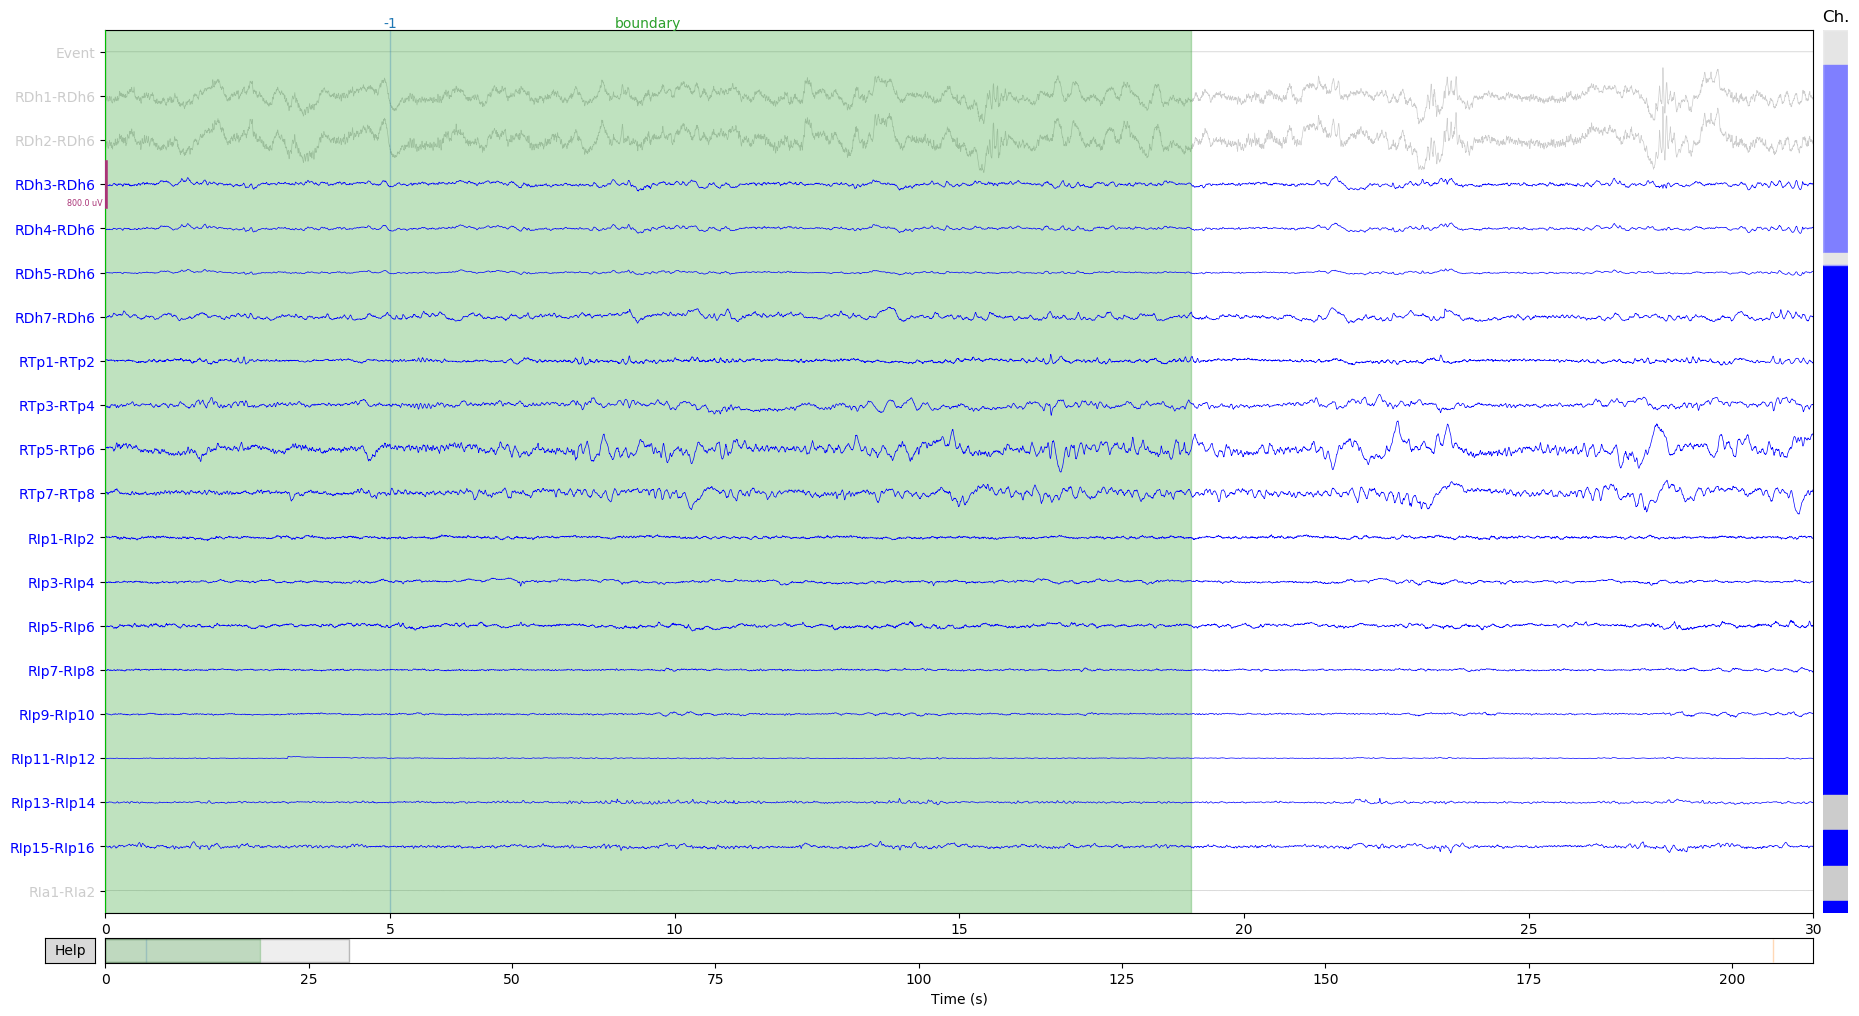

In [21]:
raw.plot(duration=30, n_channels=20, scalings=4e-4, color='b', butterfly=False)

In [8]:
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6','RPs1-RPs2','EMG']
raw.info['bads'] = bad_chan

In [9]:
events = mne.make_fixed_length_events(raw, duration=20)
epochs = mne.Epochs(raw, events, tmin=- 0.2, tmax=5, 
                    event_repeated='drop')

10 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [31]:
ica = ICA(n_components=0.5, method='fastica').fit(raw)

Fitting ICA to data using 65 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by explained variance: 4 components
Fitting ICA took 1.2s.


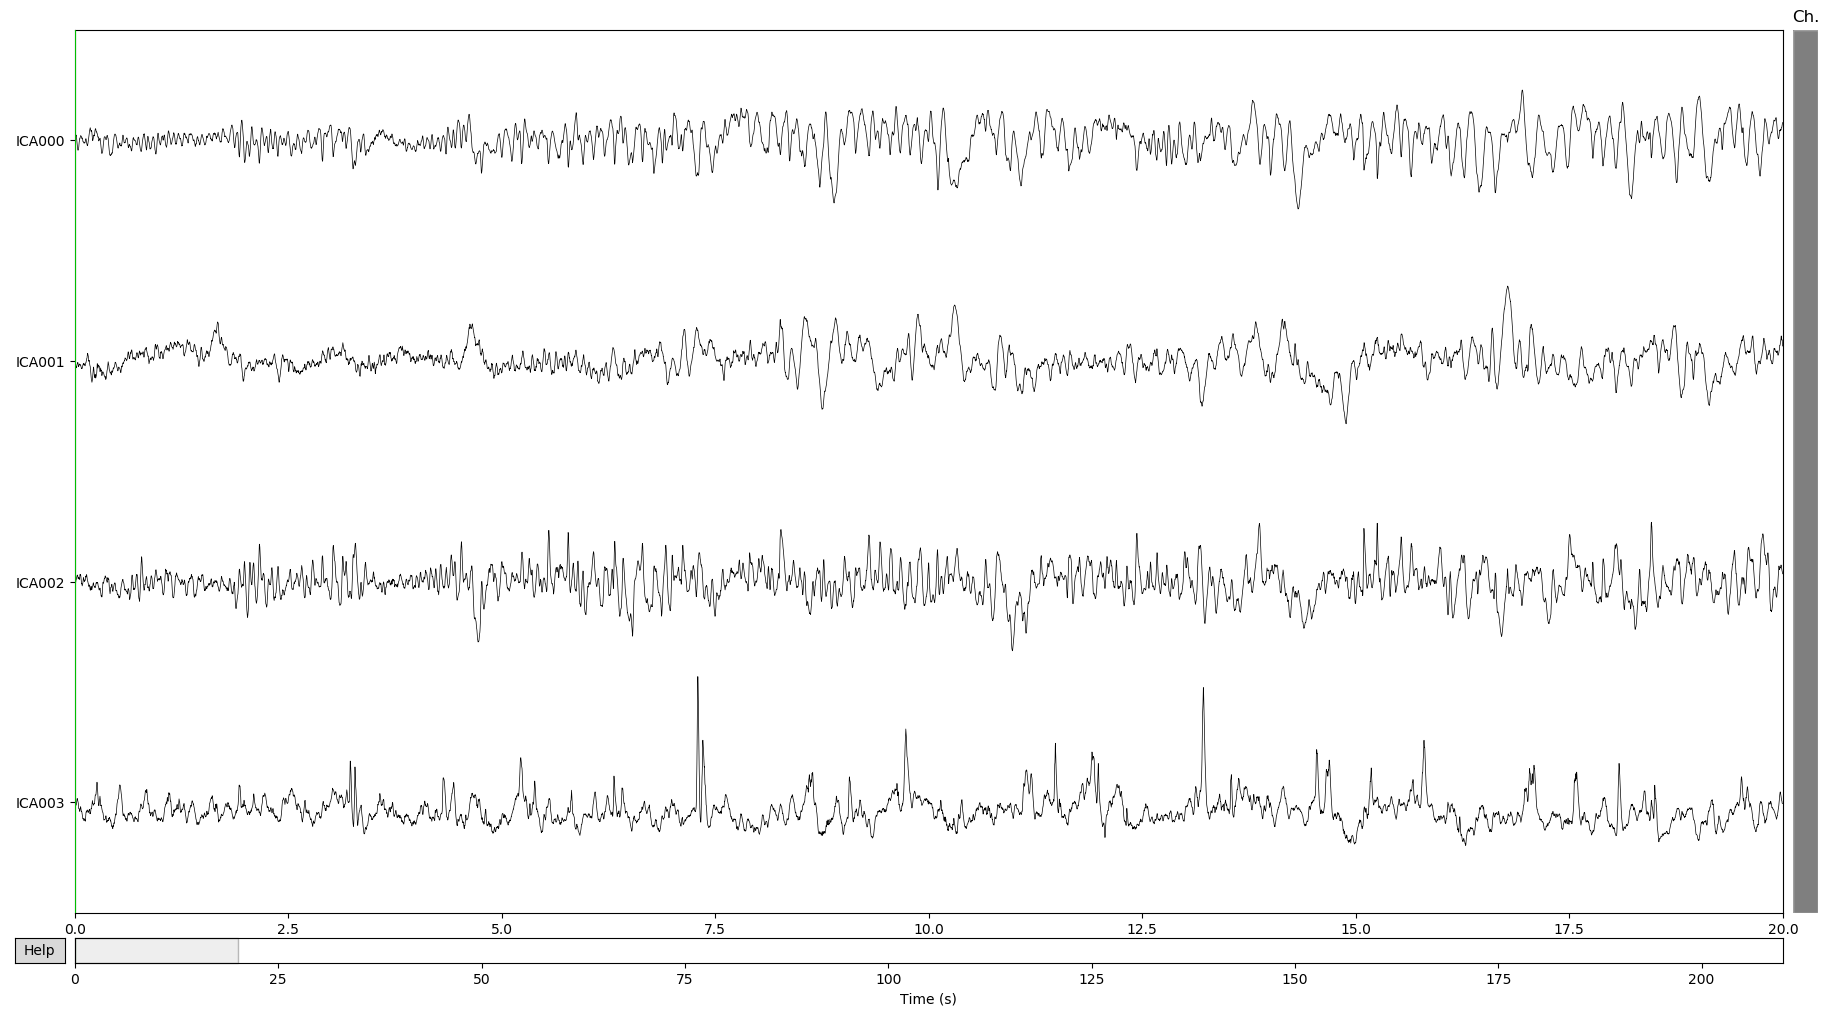

In [32]:
ica.plot_sources(raw)